In [2]:
import re # Регулярные выражения.
import requests # Загрузка новостей с сайта.
from bs4 import BeautifulSoup # Превращалка html в текст.
import pymorphy2 # Морфологический анализатор.
import pymystem3
import datetime # Новости будем перебирать по дате.
from collections import Counter # Не считать же частоты самим.
import math # Корень квадратный.`
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import csv

%matplotlib inline

In [3]:
with open('train.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
        break

['id\tname\tdescription\ttarget']


In [4]:
train = pd.read_csv('train.csv', delimiter= '\t', index_col=0)

In [5]:
train.head()

,name,description,target
id,,,
0,Заведующий отделом/секцией в магазин YORK (Уру...,<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) пр...,1
1,Наладчик станков и манипуляторов с ПУ,Обязанности:работа на токарных станках с ЧПУ T...,0
2,Разработчик С++ (Криптограф),<strong>Требования:</strong> <ul> <li>Опыт про...,0
3,Фрезеровщик,<p>Условия:</p> <ul> <li>На работу вахтовым ме...,0
4,Мерчендайзер/продавец-консультант,<p><strong>Компания Палладиум Стандарт - призн...,1


In [6]:
test = pd.read_csv('test.csv', sep = '\t', index_col=0)

In [7]:
test.head()

,name,description
id,,
200000,Дизайнер-консультант мебели,<p><strong>Обязанности:</strong></p> <ul> <li>...
200001,Продавец-консультант (ТЦ на Пушкина),<p><strong>Обязанности</strong>:</p> <p>∙ конс...
200002,Менеджер по продажам,<p>Торговый Дом «Форт» это ведущая компания Пе...
200003,Продавец-консультант в магазин одежды (ТЦ Волн...,<p><strong>Требуются продавцы консультанты в м...
200004,Специалист по охране труда,<strong>Обязанности:</strong> <ul> <li> <p>осу...


In [8]:
train.columns

Index(['name', 'description', 'target'], dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 3 columns):
name           200000 non-null object
description    200000 non-null object
target         200000 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [10]:
a = train['description'][0]
a

'<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) приглашаем на постоянную работу руководителя секции (хозтовары).</strong></p> <p><strong>Обязанности: </strong></p> <p> </p> <ul> <li>организация эффективного и культурного обслуживания покупателей</li> <li>организация приемки-сдачи товаров на склад</li> <li>консультация покупателей по вопросам, касающимся оказываемых услуг</li> <li>контроль своевременной подачи товаров в торговую секцию</li> <li>проверка качества, сроков годности ТМЦ, наличие маркировок, ценников на товарах</li> <li>организация бесперебойной работы товарной секции и участка склада, закрепленного за ней</li> <li>контроль за сохранностью товаров, торгового оборудования и прочих материальных ценностей</li> <li>инвентаризация товаров</li> </ul> <p> </p> <p><strong>Требования:</strong></p> <ul> <li>знание товарной группы</li> <li>знание правил приемки товара</li> <li>опыт работы в розничной торговле в качестве продавца 6 р. / заместителя заведующего секцией/отделом</li> <li>отве

In [11]:
other = pd.read_csv('other.csv', delimiter= '\t')

In [12]:
other.head()

,name,description
0,Специалист научно-производственного отдела,"<p>Образование - Среднее специальное, высшее</..."
1,Оператор по отгрузке товара в 1С (ТЗ),<p><strong>Обязанности:</strong></p> <ul> <li>...
2,Менеджер по персоналу,<strong>Обязанности:</strong> <ul> <li>Подбор ...
3,Ведущий бухгалтер по учёту заработной платы,<strong>Обязанности:</strong> <ul> <li> <p>Нач...
4,Инженер-расчетчик в строительный отдел,<p><strong>Требования:</strong></p> <ul> <li>у...


In [82]:
def eng(s):
#     s = a
    s1 = BeautifulSoup(s, 'lxml').text
    m = re.compile('[a-zA-Z]+', re.S).findall(s1)
    return s,s1,m
eng(other['description'][9999])

('<p><strong>Мы - международная компания, лидер в области сертификации и экспертизы промышленной безопасности. На сегодняшний день являемся ведущей компанией в данной области, работающей на российском рынке. SERCONS оформляет большинство необходимых видов обязательной и добровольной сертификации и разрешительной документации.</strong></p> <p><strong>Обязанности:</strong></p> <ul> <li>Контроль за документооборотом;</li> <li>Ведение реестров заявок.Отчетность;</li> <li>Выполнение распоряжений руководителя.</li> </ul> <strong>Требования:</strong> <ul> <li><strong>Высшее техническое образование- обязательно</strong>;</li> <li>Грамотная устная и письменная речь;</li> <li>Хваткий, живой ум, исполнительность, организованность, инициативность;</li> <li>Развитый коммуникативный навык;</li> <li>Базовое знание ПК (офисные программы, интернет);</li> </ul> <strong>Условия:</strong> <ul> <li>Официальное трудоустройство по ТК РФ;</li> <li>График 5/2 с 8:00 до 17:00 ч, пятница до 16:00;</li> <li>Зараб

In [63]:
train['description_eng'] = train['description'].apply(lambda x: 1 if (
        'responsibl' or 'Responsibl' or 'condition' or 'Condition' or 'Skill' or 'skill' or 'abilit' or 'Abilit') 
                                                      in x else '')
train[train['description_eng'] != ''].count()
# train.count()

name               833
description        833
target             833
description_eng    833
R                  833
dtype: int64

In [32]:
train.nunique()

name                70332
description        144420
target                  2
description_eng       713
dtype: int64

In [46]:
# train[train['description_eng'] != '']
# train[train['description_eng'] != '']['description_eng'][461]
# train['name'][461]
# train[train['target'] != 1].count()
# train.nunique()
# train.info()
x = train[train['target'] == 1].pivot_table(index = 'name', columns = 'target', aggfunc='count', values = 'description', fill_value=0)
x.sort_values(by = 1, ascending=False)

target,1
name,
Менеджер по продажам,5864
Торговый представитель,5155
Продавец-консультант,5123
Менеджер по работе с клиентами,3238
Продавец-кассир,1555
Мерчендайзер,1326
Менеджер по оптовым продажам,915
Руководитель отдела продаж,862
Продавец,817


In [108]:
l = []
for n,x in enumerate(train['name']):
    if eng(x)[2] != []:
        l.append([n, eng(x)[1],eng(x)[2]])
len(l)

31181

In [109]:
len(l)

31181

In [110]:
m = []
for n,x in enumerate(train['description']):
    if eng(x)[2] != []:
        m.append([n, eng(x)[0], eng(x)[1], eng(x)[2]])
len(m)

101464

In [47]:
b = other['description'][70]
b

'<p><strong>Обязанности</strong>:</p> <ul> <li>Расчет заработной платы (численность 160 сотрудников), начисление налогов и взносов;</li> <li>Расчет больничных, пособий, компенсаций;</li> <li>Выдача справок сотрудникам;</li> <li>Ведение отчетности (4-ФСС, РСВ, СЗВ-М, СЗВ-стаж, НДФЛ-2, НДФЛ-6), налоги по заработной плате, статистика по заработной плате;</li> <li>Подготовка документов к проверкам;</li> <li>Учет материалов (ввод в 1С);</li> <li>Товарно-транспортные накладные по перевозкам;</li> <li>Ввод выписок банка в 1С.</li> </ul> <p> </p> <p><strong>Требования</strong>:</p> <ul> <li>Высшее образование (бухгалтерское, экономическое);</li> <li>Опыт работы на участке &quot;расчет заработной платы&quot; от 3-х лет;</li> <li>Уверенный пользователь 1С 8.3, MS Office;</li> <li>Грамотность, ответственность, внимательность.</li> </ul> <p> </p> <p><strong>Условия</strong>:</p> <ul> <li>оформление полностью в соответствии с ТК РФ;</li> <li>официальная заработная плата (по итогам собеседования);</

In [14]:
len(sorted(list(set(train['name']))))

70332

In [15]:
sorted(list(set(train['name'])))

['!!!!!!!Программист!!!!!!!',
 '"Продаван" в В2В (Альметьевск)',
 '"Продавец-кассир" H&M (ТЦ Океания)',
 '"Холодные" продажи по телефону',
 '(11) Менеджер по продажам В2В',
 '(9) Менеджер по продажам (сырье)',
 '(CPA) Менеджер по дизайну и верстке',
 '(HQ) Android QA Engineer',
 '(HQ) Creative copywriter',
 '(HQ) Event Specialist / Event-менеджер',
 '(HQ) Key Account Manager',
 '(HQ) Retail Training Specialist / отдел розничной продажи',
 '(Moscow) Sales Manager / Руководитель отдела продаж',
 '(Moscow) Trade Marketing Specialist / Специалист по трейд-маркетингу',
 '(Nizhnij Novgorod) Sales Specialist \u200e/ Специалист по продажам',
 '(North-West) Sales Manager or Specialist / Менеджер или Специалист по продажам',
 '(Privolzhsky ) Regional Sales Manager / Региональный менеджер по продажам',
 '(Privolzhsky) Sales Manager or Specialist / Менеджер или Специалист по продажам',
 '(Senior) Java Developer',
 '(Senior) Java Developer (Position for Relocation)',
 '(Senior) Marketing Research M

In [16]:
len(sorted(list(set(test['name']))))

61614

In [17]:
sorted(list(set(other['name'])))

['!!!!!!!!Ведущий экономист!!!!!!!!!!',
 '!!!!!!!Специалист по работе с клиентами!!!!!!!!',
 '"Автокомплекс Томск" автомобили с пробегом',
 '"Атлас Крым"',
 '"Специалист\xa0по разработке планограмм"',
 '"бухгалтер на участок ""Клиент-Банк """',
 '(11) Руководитель отдела закупок',
 '(11) Руководитель отдела маркетинга',
 '(20) Секретарь',
 '(4) Руководитель склада-логист',
 '(8) Директор сервиса по кадровому администрированию',
 '(HQ) Accounting Supervisor',
 '(HQ) Manager Trainee',
 '(HQ) Russian/Chinese Translator / Переводчик (китайский/русский языки)',
 '(HQ) Sales Assistant / Specialist',
 '(HQ) Social Media and Digital Manager / Менеджер по цифровому маркетингу',
 '(Junior) Analyst',
 '(Junior) Analyst within Credit Coordination Section',
 '(Moscow) Sales Assistant / Ассистент отдела продаж',
 '(North-West) Manager-Trainee',
 '(Privolzhsky) Manager Trainee',
 '(Saint Petersburg) Sales Assistant / Ассистент отдела продаж',
 '(Saint Petersburg) Администратор офиса / Office Administ

In [18]:
print(other[other['name'] == '11']['description'].values)

['<strong>Обязанности:</strong> <ul> <li>Прием автомобиля</li> <li>Проведение диагностики</li> <li>Выполнение ремонта автомобиля</li> <li>Проверка качества выполненной работы</li> <li>Заполнение рабочего листа</li> <li>Передача автомобиля на выдачу клиенту</li> <li> </li> </ul> <strong>Требования: </strong> <ul> <li><strong>опыт работы в данной сфере, желание работать</strong></li> <li>трудолюбие</li> </ul> <strong>Условия: </strong> <ul> <li><strong>полный рабочий день</strong></li> <li>Официальное трудоустройство</li> <li>Комфортные условия труда</li> <li>Спецодежда с еженедельным обслуживанием и стиркой</li> <li>Современный инструмент и сервисное оборудование</li> <li>Стабильная заработная плата</li> </ul>']


In [63]:
a

'<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) приглашаем на постоянную работу руководителя секции (хозтовары).</strong></p> <p><strong>Обязанности: </strong></p> <p> </p> <ul> <li>организация эффективного и культурного обслуживания покупателей</li> <li>организация приемки-сдачи товаров на склад</li> <li>консультация покупателей по вопросам, касающимся оказываемых услуг</li> <li>контроль своевременной подачи товаров в торговую секцию</li> <li>проверка качества, сроков годности ТМЦ, наличие маркировок, ценников на товарах</li> <li>организация бесперебойной работы товарной секции и участка склада, закрепленного за ней</li> <li>контроль за сохранностью товаров, торгового оборудования и прочих материальных ценностей</li> <li>инвентаризация товаров</li> </ul> <p> </p> <p><strong>Требования:</strong></p> <ul> <li>знание товарной группы</li> <li>знание правил приемки товара</li> <li>опыт работы в розничной торговле в качестве продавца 6 р. / заместителя заведующего секцией/отделом</li> <li>отве

In [64]:
resp = re.compile('<strong>[Оо]бязанности: ?<\/strong>.*?<\/ul>', re.S)
r = resp.findall(a)
r

['<strong>Обязанности: </strong></p> <p> </p> <ul> <li>организация эффективного и культурного обслуживания покупателей</li> <li>организация приемки-сдачи товаров на склад</li> <li>консультация покупателей по вопросам, касающимся оказываемых услуг</li> <li>контроль своевременной подачи товаров в торговую секцию</li> <li>проверка качества, сроков годности ТМЦ, наличие маркировок, ценников на товарах</li> <li>организация бесперебойной работы товарной секции и участка склада, закрепленного за ней</li> <li>контроль за сохранностью товаров, торгового оборудования и прочих материальных ценностей</li> <li>инвентаризация товаров</li> </ul>']

In [48]:
from bs4 import BeautifulSoup
import re
#from nltk.corpus import stopwords

# def text_to_wordlist(text):
#     text = re.sub('n\'t', ' not', text)
    
#     text = re.sub('[^a-zA-Z]', ' ', text)
#     words = text.lower().split()

#     #stops = set(stopwords.words("english"))

#     return words

In [49]:
BeautifulSoup(b, 'lxml').text

'Обязанности:  Расчет заработной платы (численность 160 сотрудников), начисление налогов и взносов; Расчет больничных, пособий, компенсаций; Выдача справок сотрудникам; Ведение отчетности (4-ФСС, РСВ, СЗВ-М, СЗВ-стаж, НДФЛ-2, НДФЛ-6), налоги по заработной плате, статистика по заработной плате; Подготовка документов к проверкам; Учет материалов (ввод в 1С); Товарно-транспортные накладные по перевозкам; Ввод выписок банка в 1С.    Требования:  Высшее образование (бухгалтерское, экономическое); Опыт работы на участке "расчет заработной платы" от 3-х лет; Уверенный пользователь 1С 8.3, MS Office; Грамотность, ответственность, внимательность.    Условия:  оформление полностью в соответствии с ТК РФ; официальная заработная плата (по итогам собеседования); ДМС (+ стоматология); скидки на продукцию MARELLA и iBlus; график работы 5/2; территориальное расположение: м. Смоленская. '

In [142]:
train['R'] = train['description'].map(lambda x: 1 if 'обязанности' in x.lower() else 0)
train['S'] = train['description'].map(lambda x: 1 if 'требования' in x.lower() else 0)
train['C'] = train['description'].map(lambda x: 1 if 'условия' in x.lower() else 0)

In [98]:
# train.apply(pd.Series.value_counts)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6206: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


,name,description,target,description_eng,R,S,C
"<div>Для каждого, кто хочет работать и зарабатывать!<br />Для каждого, кто готов к профессиональному и карьерному росту!<br />Ведущая федеральная розничная сеть магазинов «Пятерочка» приглашает на работу:<br /><br />Обязанности:<br />• Обслуживание покупателей на кассе (наличный и безналичный расчет)<br />• Выкладка товара в зале<br />• Отслеживание сроков годности товара<br />• Проверка наличия ценников<br />• Консультация покупателей в зале<br /><br />Требования:<br />• Ответственность, дисциплинированность, внимательность<br /><br />Условия:<br />• Оформление в соответствии с ТК РФ,<br />• Стабильная официальная заработная плата, выплата 2 раза в месяц<br />• График работы 5/2, 2/2, возможен неполный рабочий день, неполная рабочая неделя<br />• Возможность подработки (работа по совместительству)<br />• Социальные гарантии, оплата отпусков и больничных листов<br />• Работа рядом с домом<br />• Скидки в магазинах сети<br />• Фирменная спецодежда<br />• Возможность профессионального и карьерного роста, корпоративное обучение<br />• Корпоративные мероприятия и конкурсы с ценными памятными подарками и наградами</div>\n",NaN,1.0,NaN,NaN,NaN,NaN,NaN
"<p><em><strong>Условия работы:</strong></em></p> <ul> <li>Работа 2/2 с 09:00 до 21:00 (возможен график 5/2)</li> <li>Заработная плата от 30 000₽ (оклад + % от продаж), выплачивается стабильно 2 раза в месяц</li> <li>Бесплатное профессиональное обучение за счет компании</li> <li>Развитие в крупной и успешной компании</li> <li>Предоставление корпоративной одежды</li> <li>Участие в крутых корпоративных мероприятиях</li> <li>Скидки на ассортимент товара</li> <li>Место работы в г. Москва (подбираем рабочее место ближе к дому)</li> </ul> <p> </p> <p><em><strong>Обязанности:</strong></em></p> <ul> <li>Консультация и подбор товара для клиента</li> <li>Следить за порядком на торговой точке</li> <li>Продажи тарифных планов, телефонов и другого абонентского оборудования</li> <li>Обслуживание абонентов по вопросам: замена сим-карт, детализация счета, переоформление договоров</li> <li>Решение организационных вопросов: открытие, закрытие салона‚ ведение отчетности по продажам‚ выкладка нового товара</li> </ul> <p> </p> <p><em><strong>Требования:</strong></em></p> <ul> <li>Образование не ниже среднего</li> <li>Навыки уверенного пользователя ПК, знание офисных программ Word, Excel</li> <li>Грамотная речь</li> <li>Ответственное отношение к работе</li> <li>Коммуникабельность</li> <li>Желание работать и развиваться!</li> </ul> <p><strong>Присоединяйся к команде Tele2! ;)</strong></p>\n",NaN,1.0,NaN,NaN,NaN,NaN,NaN
"<p><strong>&quot;Алкогольная Сибирская Группа&quot; - один из лидеров алкогольного рынка (торговые марки &quot;Пять Озёр&quot;, &quot;Белая Берёзка&quot;, &quot;Хаски&quot;) приглашает в свою эксклюзивную команду</strong> <strong>специалиста по развитию территории</strong><strong>:</strong></p> <p><strong>Обязанности:</strong></p> <ul> <li>выполнение планов по реализации продукции на вверенной территории,</li> <li>поддержание выкладки продукции согласно стандартов компании,</li> <li>развитие и увеличение АКБ,</li> <li>работа с мобильной торговлей,</li> <li>контроль проведения акций,</li> <li>выполнение других задач, поставленных руководителем.</li> </ul> <p><strong>Требования:</strong></p> <ul> <li>знание основ мерчендайзинга, основных этапов визита в торговую точку,</li> <li>водительское удостоверение категории В,</li> <li>коммуникабельность, клиентоориентированность, нацеленность на результат,</li> <li>желание развиваться в сфере продаж, активность.</li> </ul> <p><strong>Условия:</strong></p> <ul> <li>достойная заработная плата (оклад + бонусная часть),</li> <li>компенсационный пакет (ГСМ),</li> <li>официальное трудоустройство (стаж, отпуск, больничный),</li> <li>работа в команде профессионалов,</li> <li>корпоративное обучение,</li> <li>развитие в сфере продаж,</li> <li>возможность карьерного роста,</li> <li>работа в крупной федеральной Компан

In [143]:
train['RS'] = np.where(((train['R'] == 1) & (train['S'] == 1) & (train['C'] != 1)),1,0)
train['RC'] = np.where(((train['R'] == 1) & (train['S'] != 1) & (train['C'] == 1)),1,0)
train['SC'] = np.where(((train['R'] != 1) & (train['S'] == 1) & (train['C'] == 1)),1,0)
train['RSC'] = np.where(((train['R'] == 1) & (train['S'] == 1) & (train['C'] == 1)),1,0)

In [144]:
train[train['RSC'] == 1]

,name,description,target,description_eng,R,S,C,RS,RC,SC,RSC
id,,,,,,,,,,,
1,Наладчик станков и манипуляторов с ПУ,Обязанности:работа на токарных станках с ЧПУ T...,0,,1,0,1,0,1,0,0
58,Account Manager,<p>Амбициозная digital-команда рекламного аген...,0,,1,0,1,0,1,0,0
77,Программист 1С 8,<p><strong>Обязанности:</strong></p> <ul> <li>...,0,,1,0,1,0,1,0,0
154,Инженер-программист 1C,<p><strong>Обязанности:</strong></p> <ul> <li>...,0,,1,0,1,0,1,0,0
244,Продавец-кассир,"В федеральную сеть магазинов FIX PRICE, требуе...",1,,1,0,1,0,1,0,0
323,Продавец-консультант в магазин-ресторан,<p><strong>Продавец-консультант в магазин-рест...,1,,1,0,1,0,1,0,0
329,Менеджер по оптовым продажам,"<p>Ищем сотрудника, менеджер по продажам. для ...",1,,1,0,1,0,1,0,0
428,Супервайзер отдела продаж B2C,<p><strong>Приглашаем в нашу дружную команду С...,1,,1,0,1,0,1,0,0
497,Супервайзер канала (HoReCa),<p>Крупная иностранная компания объявляет конк...,1,,1,0,1,0,1,0,0


In [150]:
train.columns
for c in ['R', 'S', 'C', 'RS', 'RC', 'SC', 'RSC']:
    print(c, train[train[c] == 0][c].count())

R 37744
S 32814
C 40863
RS 186829
RC 196359
SC 192923
RSC 57681


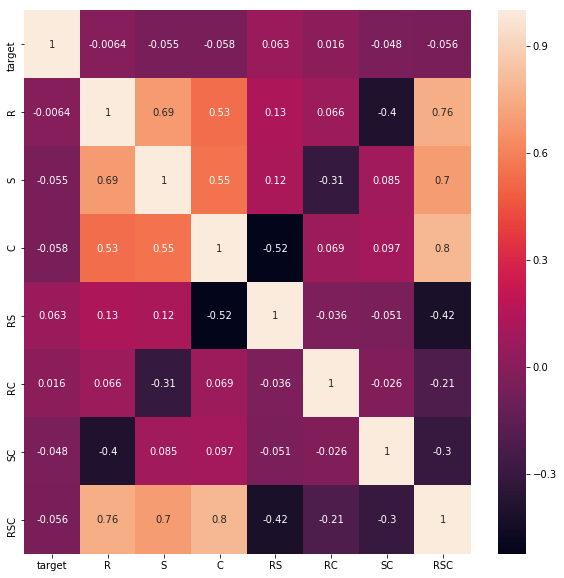

In [155]:
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train.corr(), ax = ax, annot=True)

In [73]:
BeautifulSoup(train['description'][10], 'lxml').text

'Сегодня Плэйкот - это 8 лет истории, 110 профессионалов и 3 игры в Top Grossing Facebook. Наш подход к работе прост: мы даем талантливым, увлеченным играми и ценящим качество людям возможность принимать решения самостоятельно. Многим трудно поверить, но у нас слово команды в том, что и как делать в игре, действительно является решающим.   Серверная часть эпического проекта "Age of Magic" ждет своего героя! Совсем скоро состоится глобальный запуск игры, и к этому моменту все должно быть идеально. И, конечно же, стабильно!   Что мы вам доверим:  разработку и поддержку сервера игры; продумывание и разработку сервисов и инструментов для мониторинга и технической поддержки игры.    Наши пожелания к кандидату:  опыт разработки серверной части приложения от 2-х лет; отличное знание JavaScript; опыт работы с высоконагруженными проектами; опыт работы с PostgreSQL; опыт работы с NoSQL (MongoDB/DynamoDB).    Также придутся кстати:  опыт работы с Amazon Web Services (EC2, Autoscaling, DynamoDB); 

In [55]:
b.lower()

'<p><strong>обязанности</strong>:</p> <ul> <li>расчет заработной платы (численность 160 сотрудников), начисление налогов и взносов;</li> <li>расчет больничных, пособий, компенсаций;</li> <li>выдача справок сотрудникам;</li> <li>ведение отчетности (4-фсс, рсв, сзв-м, сзв-стаж, ндфл-2, ндфл-6), налоги по заработной плате, статистика по заработной плате;</li> <li>подготовка документов к проверкам;</li> <li>учет материалов (ввод в 1с);</li> <li>товарно-транспортные накладные по перевозкам;</li> <li>ввод выписок банка в 1с.</li> </ul> <p> </p> <p><strong>требования</strong>:</p> <ul> <li>высшее образование (бухгалтерское, экономическое);</li> <li>опыт работы на участке &quot;расчет заработной платы&quot; от 3-х лет;</li> <li>уверенный пользователь 1с 8.3, ms office;</li> <li>грамотность, ответственность, внимательность.</li> </ul> <p> </p> <p><strong>условия</strong>:</p> <ul> <li>оформление полностью в соответствии с тк рф;</li> <li>официальная заработная плата (по итогам собеседования);</

In [ ]:
class Job:
    title = []     # Название должности
    responsibilities = [] # Обязанности, словарь
    skills = [] # Требования, словарь
    conditions = [] # Условия, словарь
    other = [] # Прочеее описание, словарь
        
    # Конструктор - компилирует регулярные выражения и загружает морфологию.
    def __init__(self):
        self.delscript = re.compile("<script.*?>.+?</script>", re.S)
        self.findheaders = re.compile("<h1.+?>(.+)</h1>", re.S)
        self.boa = re.compile('<div class="b-text clearfix js-topic__text" itemprop="articleBody">', re.S)
        self.eoa = re.compile('<div class="b-box">\s*?<i>', re.S)
        self.findURLs = re.compile('<h3>(.+?)</h3>', re.S)
        self.rboa = re.compile('<p class="MegaArticleBody_first-p_2htdt">', re.S)
        self.reoa = re.compile('<div class="Attribution_container_28wm1">', re.S)
        self.rfindURLs = re.compile('''<div class="headlineMed"><a href='(.+?)'>''', re.S)
        # Создаем и загружаем морфологический словарь.
        self.morph=pymorphy2.MorphAnalyzer()